In [2]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection

In [3]:
img = np.load("celeb_transformed/Angelina Jolie/001_fe3347c0.npy")

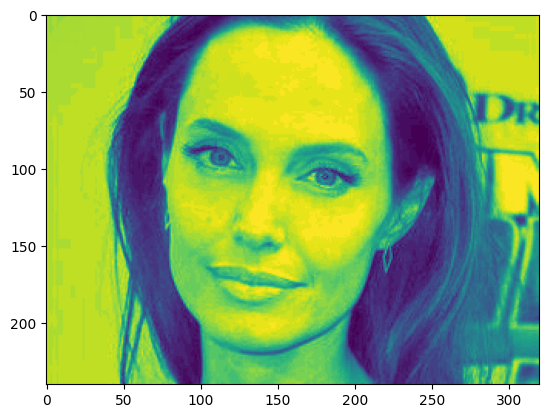

In [4]:
norm_img = img/np.max(img)
plt.imshow(norm_img.T)

In [5]:
celebs_path = Path("celeb_transformed")
labels = [celeb.name for celeb in celebs_path.iterdir()]

In [6]:
le = LabelEncoder()
le.fit(labels)
print(le.classes_)
le.transform(labels)

['Angelina Jolie' 'Brad Pitt' 'Denzel Washington' 'Hugh Jackman'
 'Jennifer Lawrence' 'Johnny Depp' 'Kate Winslet' 'Leonardo DiCaprio'
 'Megan Fox' 'Natalie Portman' 'Nicole Kidman' 'Robert Downey Jr'
 'Sandra Bullock' 'Scarlett Johansson' 'Tom Cruise' 'Tom Hanks'
 'Will Smith']


array([15, 10,  5,  7, 11,  1,  6,  3, 16,  8, 14,  9,  4, 13,  2, 12,  0])

In [7]:
labels = []
data = []
for celeb in celebs_path.iterdir():
    for file in celeb.iterdir():
        img = np.load(file)
        data.append(img)
        labels.append(le.transform([celeb.name])[0])

labels = np.array(labels)
data = np.array(data)
    

In [8]:
print(labels.shape)
print(data.shape)

(1642,)
(1642, 320, 240)


In [9]:
from collections import Counter
print(Counter(labels))

Counter({13: 184, 7: 97, 3: 96, 4: 96, 11: 95, 9: 95, 2: 94, 10: 92, 8: 92, 6: 91, 15: 90, 14: 89, 12: 89, 0: 89, 5: 86, 1: 84, 16: 83})


In [10]:
train_data, validation_data, train_labels, validation_labels= model_selection.train_test_split(data,labels, random_state=42,test_size=0.2)

print('train data shape:',np.shape(train_data))
print('validation data shape:',np.shape(validation_data))
print('train labels shape:',np.shape(train_labels))
print('validation labels shape:',np.shape(validation_labels))

train data shape: (1313, 320, 240)
validation data shape: (329, 320, 240)
train labels shape: (1313,)
validation labels shape: (329,)


In [11]:
mean = np.mean(train_data, axis = 0)
std = np.std(train_data, axis = 0)

train_data = (train_data-mean) / std
validation_data = (validation_data-mean) / std

In [12]:
train_data = train_data[:,:,:,np.newaxis]
train_data[0].shape

(320, 240, 1)

In [13]:
classes = len(le.classes_)
classes

17

In [14]:
import gc
gc.collect()

71

In [15]:
train_data.shape

(1313, 320, 240, 1)

In [23]:
model = keras.models.Sequential([
    #keras.layers.Input(shape=train_data[0].shape),
    keras.layers.MaxPool2D((2,2), input_shape=train_data.shape[1:]),
    keras.layers.Dropout(0.5),
    keras.layers.Conv2D(16, (3,3), activation="relu"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(32, (3,3), activation="relu"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(32, (3,3), activation="relu"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(32, (3,3), activation="relu"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    #keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(classes, activation="softmax")
    ])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling2d_19 (MaxPoolin  (None, 160, 120, 1)      0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 160, 120, 1)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 158, 118, 16)      160       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 79, 59, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 77, 57, 32)        4640      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 38, 28, 32)      

In [29]:
#callback = keras.callbacks.EarlyStopping(monitor="loss", verbose=1, patience=10, min_delta=0.0001, mode="auto")
history = model.fit(train_data, train_labels, validation_data=(validation_data, validation_labels), batch_size=32, epochs=1)#, callbacks=[callback])

42/42 [==============================] - 8s 181ms/step - loss: 1.3421e-04 - accuracy: 1.0000 - val_loss: 5.9331 - val_accuracy: 0.3465


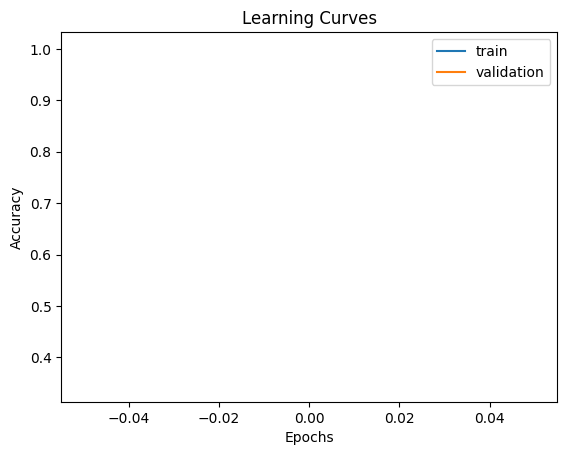

In [30]:
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()

In [40]:
model.save("model")

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


In [38]:
img_axis = img[:,:,np.newaxis]
img_axis.shape

(320, 240, 1)

In [39]:
model.predict(img_axis)

ValueError: in user code:

    File "/home/edvin/miniconda3/envs/eitp40/lib/python3.10/site-packages/keras/engine/training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "/home/edvin/miniconda3/envs/eitp40/lib/python3.10/site-packages/keras/engine/training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/edvin/miniconda3/envs/eitp40/lib/python3.10/site-packages/keras/engine/training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "/home/edvin/miniconda3/envs/eitp40/lib/python3.10/site-packages/keras/engine/training.py", line 1983, in predict_step
        return self(x, training=False)
    File "/home/edvin/miniconda3/envs/eitp40/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/edvin/miniconda3/envs/eitp40/lib/python3.10/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 320, 240, 1), found shape=(32, 240, 1)
